# Flight Fare Prediction Using Machine Learning 

In this project, we will do analysis of flight fare prediction datset with the help of data analysis techniques and we will extract some insights from data and make some prediction on the basis of features like airline type, arrival time, duration of flight and more. 

This will be regression problem so target variable is price

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn.linear_model 

#### data feature information



Airline: Name of the airline used for traveling

Date_of_Journey: Date at which a person traveled

Source: Starting location of flight

Destination: Ending location of flight

Route: This contains information on starting and ending location of the journey in the standard format used by airlines.

Dep_Time: Departure time of flight from starting location

Arrival_Time: Arrival time of flight at destination

Duration: Duration of flight in hours/minutes

Total_Stops: Number of total stops flight took before landing at the destination.

Additional_Info: Shown any additional information about a flight

Price: Price of the flight




#### READ the dataset

In [441]:
df_train=pd.read_excel(r"Data_Train.xlsx")

In [442]:
pd.set_option('display.max_columns', None)

In [443]:
# how look like the train data
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [444]:
# Type of data
type(df_train)


pandas.core.frame.DataFrame

our data type is dataframe


In [445]:
# Shape of data 
df_train.shape

(10683, 11)

In [446]:
# some information about data 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [447]:
# check duplicate values in dataframe
df_train.duplicated().sum()

220

in our train data we have 220 dulicate values 
first we should remove that 

In [448]:
df_train.drop_duplicates(keep = "first", inplace=True)

In [449]:
df_train.duplicated().sum()

0

In [450]:
df_train.shape

(10463, 11)

In [451]:
# check null value in dataset
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

in data set  Route and Total_Stop contain null value


In [452]:
# drop the null value because one one value
df_train.dropna(inplace=True)

In [453]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [454]:
# column name or feature name present in data
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [455]:
# statestical information of data
df_train.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


### Data visualization

The unique Total stop : 
 ['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
............................................................
count plot for Total_Stops feature/column


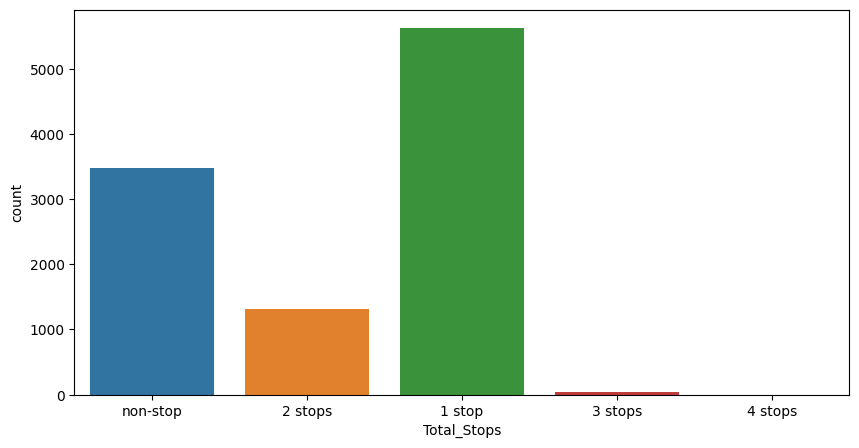

In [456]:
# df_train["Total_Stops"].value_counts()


print("The unique Total stop : \n",df_train["Total_Stops"].unique())
print("...."*15)
print("count plot for Total_Stops feature/column")
plt.figure(figsize=(10,5))
sns.countplot(x=df_train["Total_Stops"])
plt.show()

In [457]:
# in info column 78.20 value are no info 
# so we can delete this column from data

df_train["Additional_Info"].value_counts(normalize=True)*100

df_train.drop(["Additional_Info"], axis=1, inplace=True)

In [458]:
df_train["Route"].value_counts()

# Route and Total_Stops are provide same information 

df_train.drop(["Route"], axis=1, inplace=True)

from below command we get the 

-- if Source is Delhi then destination is Cochin

-- if Source is Kolkata then destination is Banglore

-- if Source is Banglore  then destination is Delhi and New delhi

-- if Source is Mumbai then destination is hyderabad

-- if Source is Channai then destination is kolkata


In [459]:
# df_train.loc[(df_train["Source"]=="Delhi") & (df_train["Destination"]=="Cochin")]
# df_train.loc[(df_train["Source"]=="Kolkata") & (df_train["Destination"]=="Banglore")]
# df_train.loc[(df_train["Source"]=="Banglore") & (df_train["Destination"]=="Delhi")]


The unique city in source : 
 ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
............................................................
count plot for source feature/column


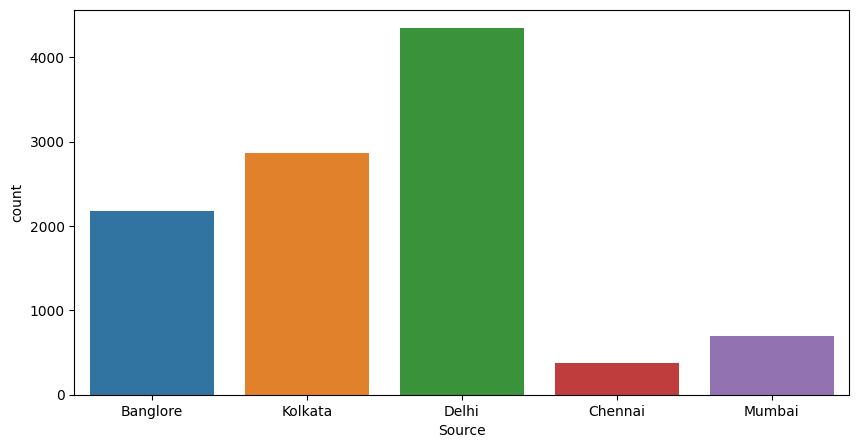

In [460]:
print("The unique city in source : \n",df_train["Source"].unique())
print("...."*15)
print("count plot for source feature/column")
plt.figure(figsize=(10,5))
sns.countplot(x=df_train["Source"])
plt.show()

The unique city in Destination : 
 ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
............................................................
count plot for Destination feature/column


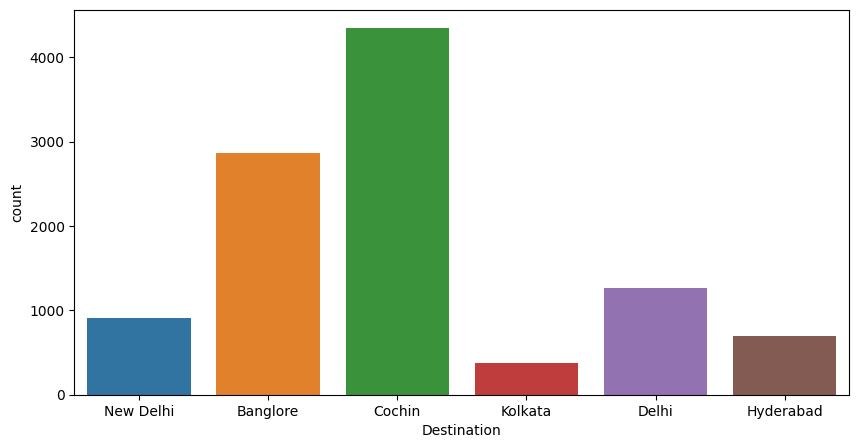

In [461]:
print("The unique city in Destination : \n",df_train["Destination"].unique())
print("...."*15)
print("count plot for Destination feature/column")
plt.figure(figsize=(10,5))
sns.countplot(x=df_train["Destination"])
plt.show()

The unique Airline  : 
 ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
............................................................
count plot for Airlines feature/column


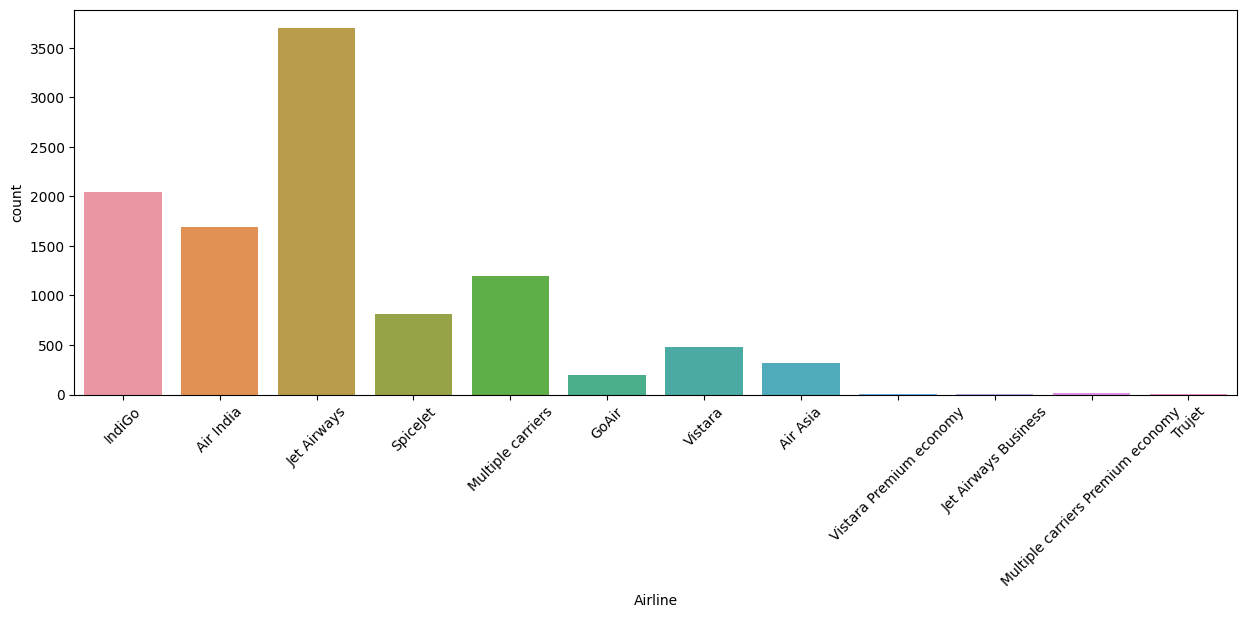

In [462]:
print("The unique Airline  : \n",df_train["Airline"].unique())
print("...."*15)
print("count plot for Airlines feature/column")
plt.figure(figsize=(15,5))
sns.countplot(x=df_train["Airline"])
plt.xticks(rotation=45)
plt.show()


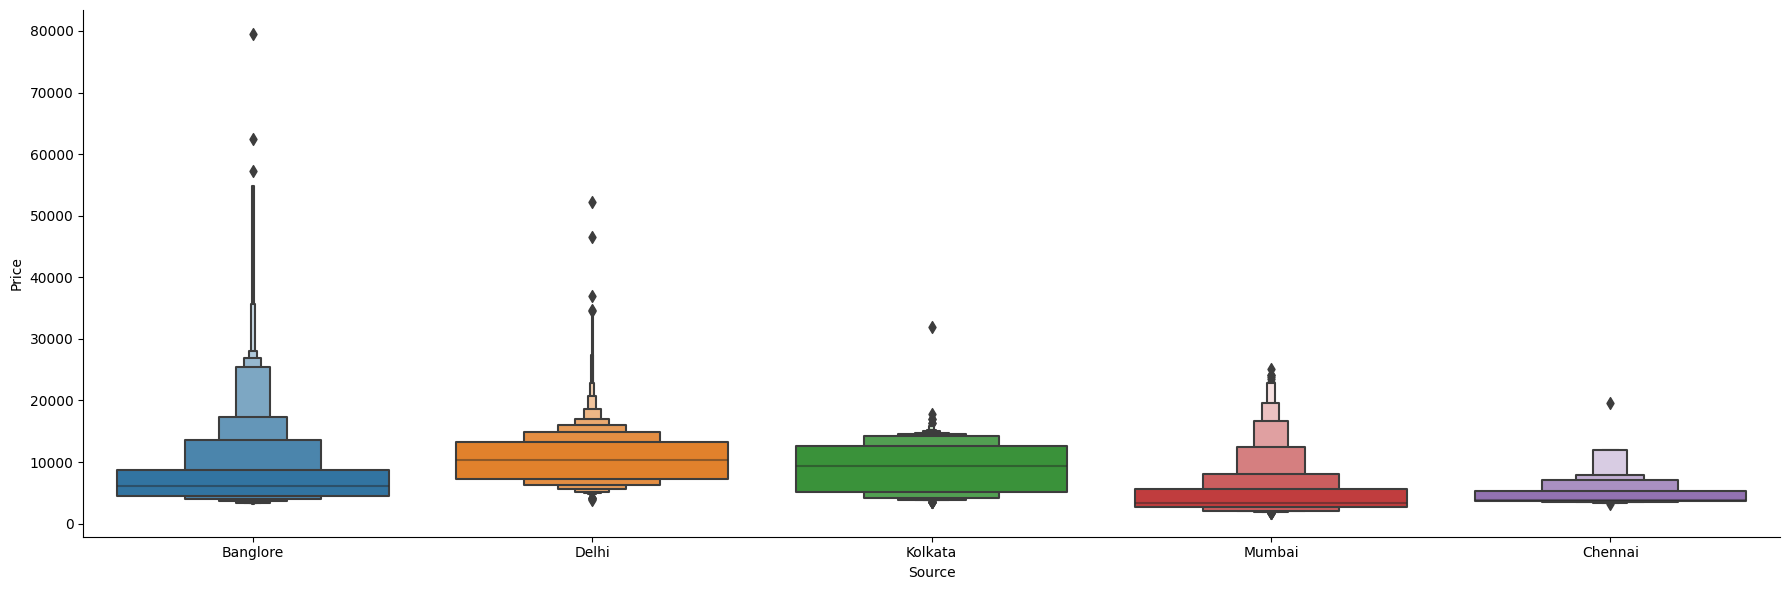

In [463]:
sns.catplot(y='Price', x='Source', data=df_train.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)


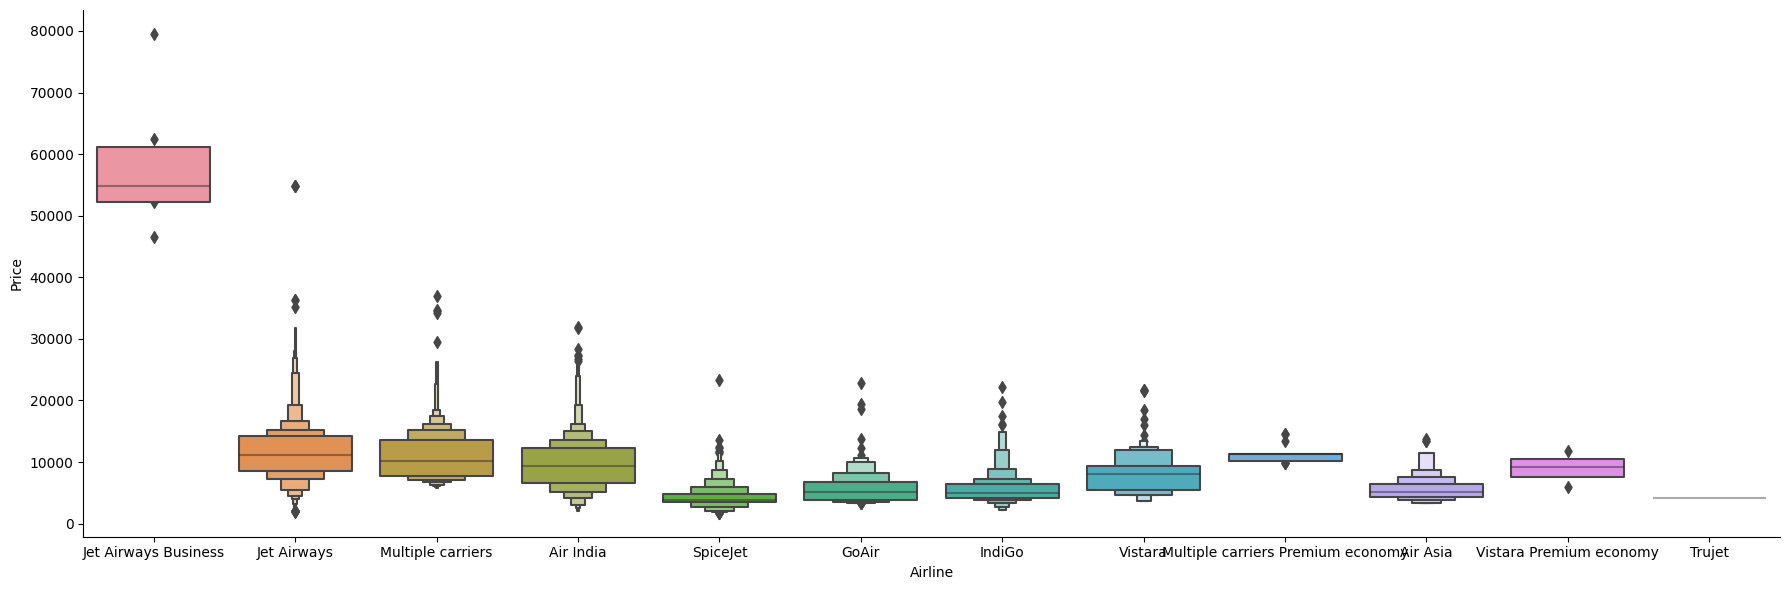

In [464]:
sns.catplot(y="Price", x="Airline", data=df_train.sort_values("Price", ascending=False), kind='boxen', height=6, aspect=3)

## Feature engineering

In [465]:
# in data set only one column is int column i.e. price
# first we seperate out the Date_Of_journey into date month 
# departure time in hour and minute
# arrival time hour and minute
# Duration-- hour and minut

In [466]:
# journey DAY seprete out from date of journey
df_train["Journy_Day"]=pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [467]:
# journey MONTH seprete out from date of journey
df_train["Journy_Month"]=pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [468]:
# we should drop the Date_of_Journey
df_train.drop("Date_of_Journey", axis=1, inplace=True)

In [469]:
# Departure time:-The time when the plane leaves the gate of the airport
df_train["Dep_hour"]=pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_minute"]=pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train.drop("Dep_Time", axis=1, inplace=True)

In [470]:
# Arrival time is when the plane pulls up to the gate. 

df_train["Arrival_hour"]=pd.to_datetime(df_train["Arrival_Time"]).dt.hour
df_train["Arrival_minute"]=pd.to_datetime(df_train["Arrival_Time"]).dt.minute
df_train.drop("Arrival_Time", axis=1, inplace=True)

In [471]:
# difference between Departure Time and Arrival Time 
# Duration :- time taken to reach destination
duration=list(df_train["Duration"])
# print(duration)
for i in range(len(duration)):
    if len(duration[i].split()) != 2:  # duration contain only hour or only minutes 
        if "h" in duration[i]:
            duration[i] = duration[i].strip() +" 0m"   # adding 0 mins where min not present
        else:
            duration[i] = "0h "+duration[i]    # adding 0 hours where hours not present


duration_in_hours = []
duration_in_minutes = []
for i in range(len(duration)):
    duration_in_hours.append(int(duration[i].split("h")[0]))   # only hours extracted from duration
    duration_in_minutes.append(int(duration[i].split("m")[0].split()[-1]))  # extract mitunes from duration


# create the new column for duration hour and duration minute
df_train["Duration_in_hours"]=duration_in_hours
df_train["Duration_in_minutes"]=duration_in_minutes


# drop the Duration column from data
df_train.drop(["Duration"], axis=1, inplace=True)

### Encoding

In [472]:
# dummy encoding because order is not important
Airline = df_train[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)

In [473]:
# dummy encoding because order is not important
Source = df_train[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [474]:
# dummy encoding because order is not important

Destination = df_train[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [475]:
## As this is case of Ordinal Categorical type we perform LabelEncoder
## Here vlaues are assigned with corresponding keys
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

In [476]:
train_data = pd.concat([df_train, Airline, Source, Destination], axis=1)

In [477]:
train_data.drop(['Destination', 'Source', 'Airline'], axis=1, inplace=True)

In [478]:
train_data.head(3)

,Total_Stops,Price,Journy_Day,Journy_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_in_hours,Duration_in_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


#### Test data set

In [479]:
# read the test data
df_test=pd.read_excel(r"Test_set.xlsx")
df_test.head(3)


print("Test data Info")
print("-"*75)
print(df_test.info())

print()
print()

print("Null values in Test dat:")
print("-"*75)
df_test.dropna(inplace = True)
print(df_test.isnull().sum())



# Date_of_Journey
df_test["Journy_Day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journy_Month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_minute"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_minute"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_in_hours = []
duration_in_minutes = []
for i in range(len(duration)):
    duration_in_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_in_minutes.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test data set
df_test["Duration_in_hours"] = duration_in_hours
df_test["Duration_in_minutes"] = duration_in_minutes
df_test.drop(["Duration"], axis = 1, inplace = True)




print("Airline")
print("-"*75)
print(df_test["Airline"].value_counts())
Airline = df_train[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)


print()

print("Source")
print("-"*75)
# one hot encoding encoding because order is not important
print(df_test["Source"].value_counts())
Source = df_test[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
# Source.head()

print()

# encoding the categorical data
print("Destination")
print("-"*75)
Destination = df_test[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
# Destination.head()


# Additional_Info contains 78.20% no_info
# Route and Total_Stops are related to each other
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> df_test + Airline + Source + Destination
df_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", df_test.shape)
df_test.head(3)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values in Test dat:
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Ti

,Total_Stops,Journy_Day,Journy_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_in_hours,Duration_in_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Feature selection

In [480]:
train_data.shape

(10462, 30)

In [481]:
x=train_data.drop(["Price"], axis=1)
x

,Total_Stops,Journy_Day,Journy_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_in_hours,Duration_in_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [482]:
y=train_data["Price"]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

/tmp/ipykernel_53155/3952288923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

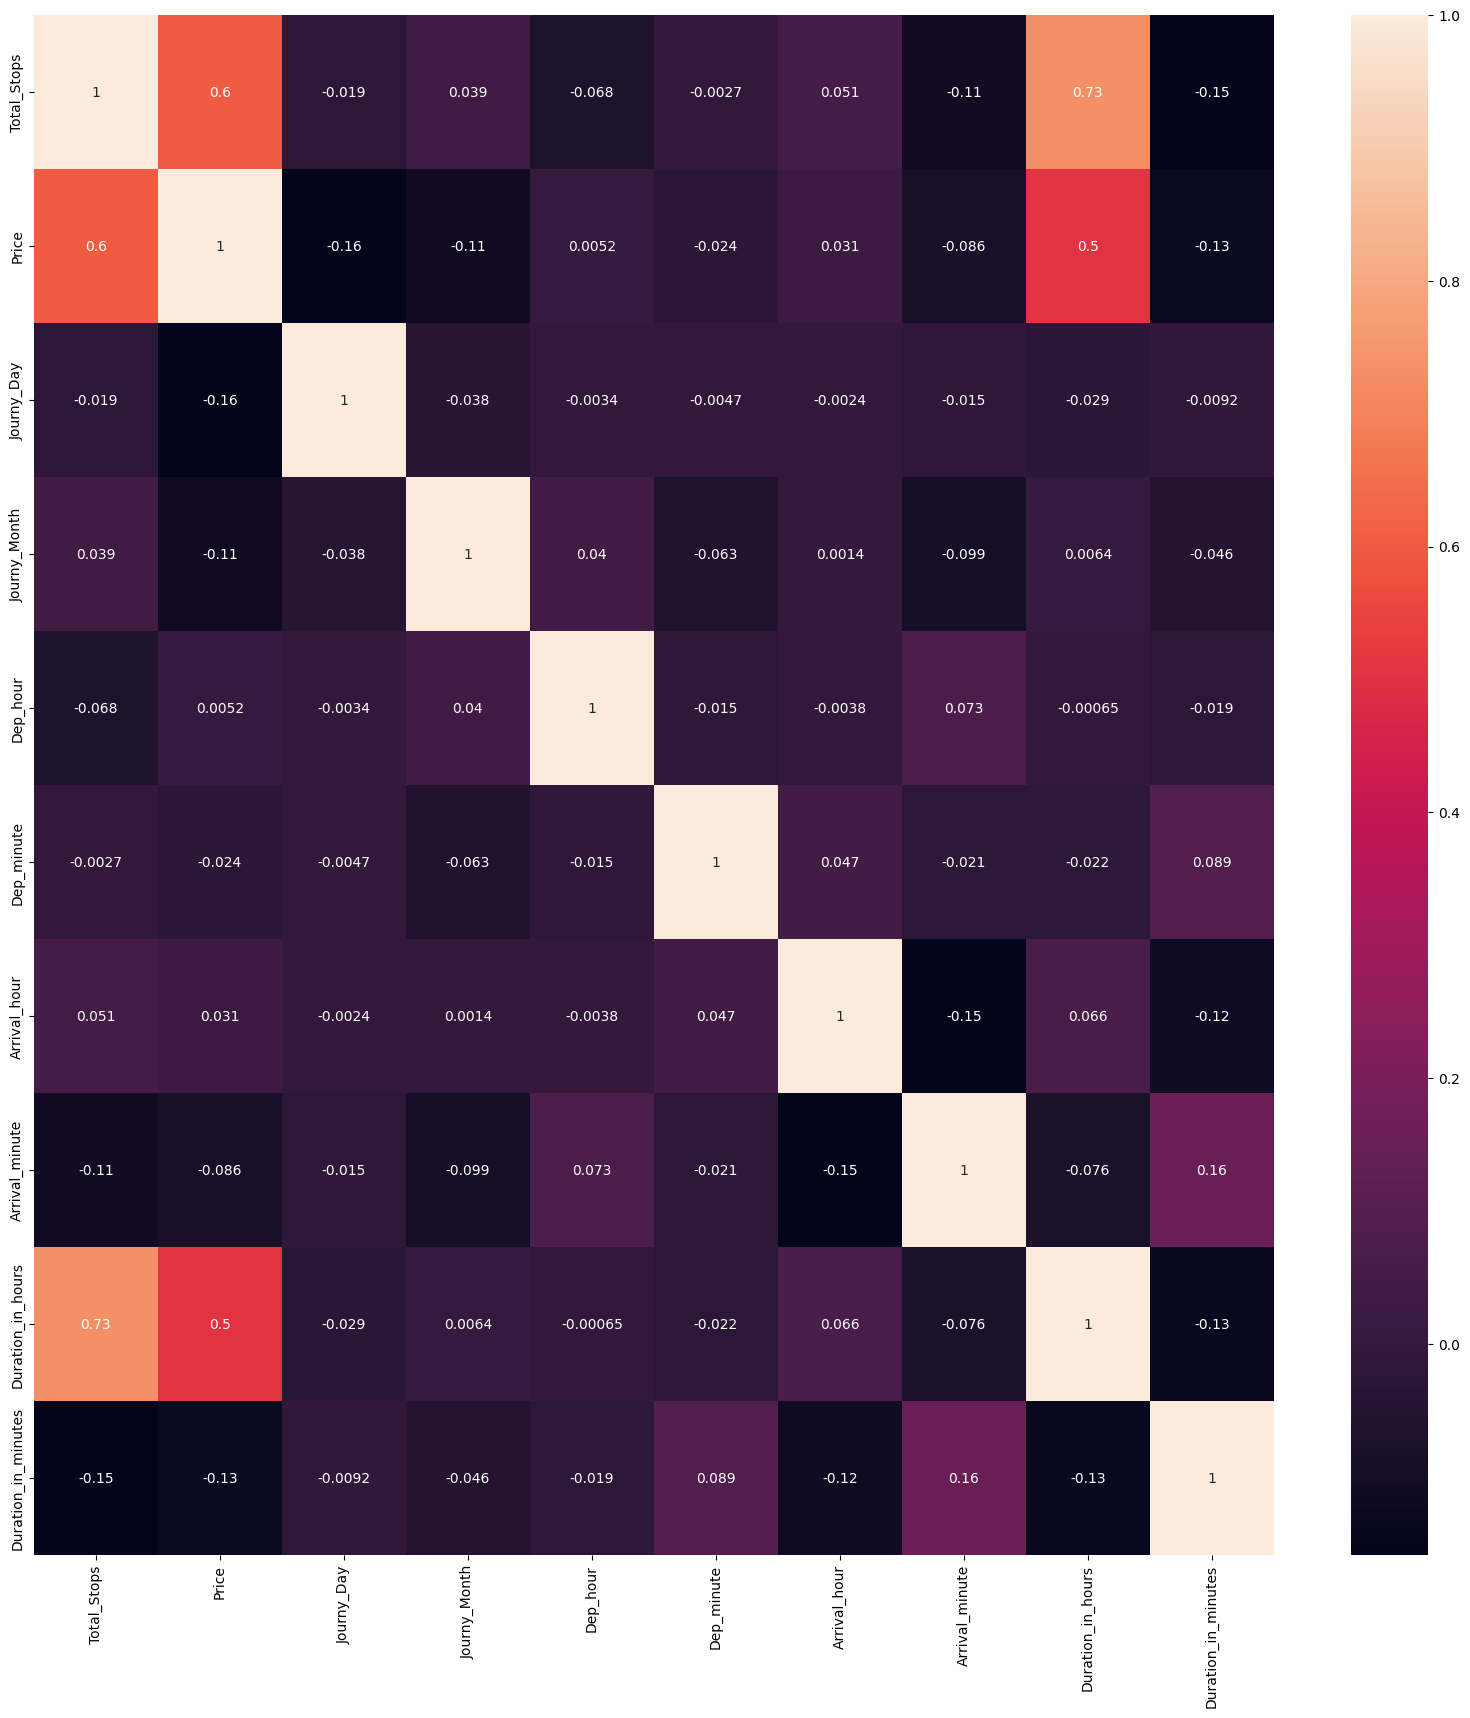

In [483]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True)
plt.show

## Model training

In [484]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [485]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [486]:
y_predict = rf_model.predict(x_test)

In [487]:
rf_model.score(x_train,y_train)

0.9534564928028403

In [488]:
rf_model.score(x_test,y_test)

0.8141202339221063

In [489]:
### Evaluation of model

from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE:  1178.959305890107
MSE:  3875644.4957849607
RMSE:  1968.6656637898068


In [490]:
metrics.r2_score(y_test,y_predict)

0.8141202339221063

## Hyperparameter Tunning

In [491]:
from sklearn.model_selection import RandomizedSearchCV

# Randa=omized Search CV 
# Number of trees in random forest 
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of feature to consider at every split
max_features = ["auto", "sqrt"]

## Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# Maximum number of samples required at each split a node
min_samples_split = [2, 5, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# # create random grid
# random_grid = {"n_estimators" : n_estimators,
#                 "max_features" : max_features,
#                 "max_depth" : max_depth,
#                 "min_sample_split" : min_samples_split,
#                 "min_sample_leaf" : min_samples_leaf}
# print(random_grid)

## create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, 
            n_iter = 10, cv = 5, random_state = 42 , n_jobs = -1)  #verbose = 2, scoring = "neg_mean_squared_error",

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [492]:
x_train.shape, y_train.shape

((8369, 29), (8369,))

In [493]:
rf_random.fit(x_train, y_train)

/home/bharat/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/bharat/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/bharat/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42)

In [494]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [495]:
y_predict = rf_random.predict(x_test)

In [496]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE:  1289.436567131418
MSE:  3852474.4256344526
RMSE:  1962.7721277913167


In [497]:
metrics.r2_score(y_test, y_predict)

0.8152314935395115

In [498]:
import pickle 
file = open("model.pkl", 'wb')
pickle.dump(rf_random, file)

In [499]:
model = pickle.load(open("model.pkl", 'rb'))

In [500]:
y_predict = model.predict(x_test)

In [501]:
# y_predict = model.predict(df_test)